In [151]:
import pandas as pd

In [152]:
data=pd.read_csv("telecom_churn_dataset.csv")

In [153]:
data.head()

,customer_id,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,contract_type,network_quality_rating,churn
0,1,52,1116.61,20.28,1,Postpaid,1,0
1,2,15,523.34,23.36,7,Prepaid,3,0
2,3,61,629.33,33.69,6,Prepaid,4,0
3,4,21,764.79,16.77,7,Postpaid,3,0
4,5,24,529.79,31.07,0,Postpaid,3,0


In [154]:
#data.tail()

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             500 non-null    int64  
 1   tenure_months           500 non-null    int64  
 2   monthly_charges         500 non-null    float64
 3   total_data_usage_gb     500 non-null    float64
 4   customer_complaints     500 non-null    int64  
 5   contract_type           500 non-null    object 
 6   network_quality_rating  500 non-null    int64  
 7   churn                   500 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.4+ KB


In [156]:
data.describe()

,customer_id,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,network_quality_rating,churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,35.680000,860.047820,20.516040,3.408000,3.006000,0.302000
std,144.481833,20.812591,360.369225,11.425295,2.271532,1.426195,0.459585
min,1.000000,1.000000,203.370000,1.010000,0.000000,1.000000,0.000000
25%,125.750000,17.000000,553.552500,10.557500,1.000000,2.000000,0.000000
50%,250.500000,35.000000,885.245000,21.110000,3.000000,3.000000,0.000000
75%,375.250000,54.000000,1165.012500,30.067500,5.000000,4.000000,1.000000
max,500.000000,71.000000,1497.000000,39.970000,7.000000,5.000000,1.000000


In [157]:
#Missing value
data.isnull().values.any()

False

In [158]:
missing_values=data.isnull().sum()
missing_values

customer_id               0
tenure_months             0
monthly_charges           0
total_data_usage_gb       0
customer_complaints       0
contract_type             0
network_quality_rating    0
churn                     0
dtype: int64

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

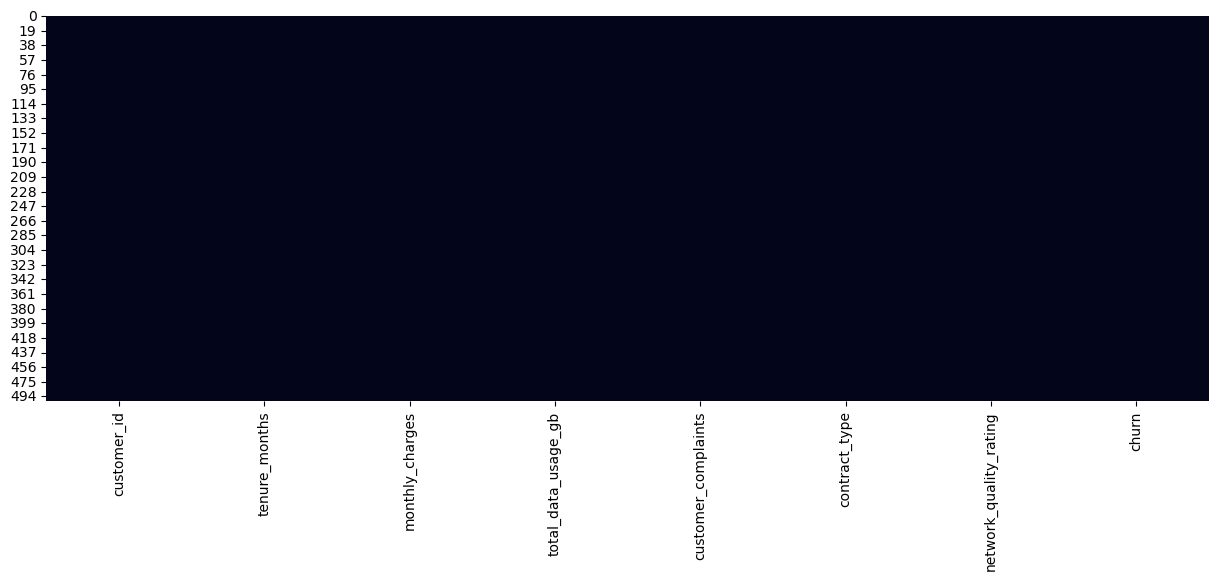

In [160]:
plt.rcParams["figure.figsize"]=[15,5]
#plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(data.isnull(),cbar=False)
plt.show()

In [161]:
#There is no missing value,so moving next

In [162]:

data.drop(columns='customer_id', axis=1, inplace=True) 

In [163]:
data.head()

,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,contract_type,network_quality_rating,churn
0,52,1116.61,20.28,1,Postpaid,1,0
1,15,523.34,23.36,7,Prepaid,3,0
2,61,629.33,33.69,6,Prepaid,4,0
3,21,764.79,16.77,7,Postpaid,3,0
4,24,529.79,31.07,0,Postpaid,3,0


In [164]:
from sklearn.preprocessing import OneHotEncoder

In [165]:
encode = OneHotEncoder()

In [166]:
df_encode = pd.DataFrame(encode.fit_transform(data[['contract_type']]).toarray(), columns = ['Postpaid', 'Prepaid'])

In [167]:
df_encode.head()

,Postpaid,Prepaid
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [168]:
df_encode = pd.concat([data, df_encode], axis=1)

In [169]:
df_encode.head()

,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,contract_type,network_quality_rating,churn,Postpaid,Prepaid
0,52,1116.61,20.28,1,Postpaid,1,0,1.0,0.0
1,15,523.34,23.36,7,Prepaid,3,0,0.0,1.0
2,61,629.33,33.69,6,Prepaid,4,0,0.0,1.0
3,21,764.79,16.77,7,Postpaid,3,0,1.0,0.0
4,24,529.79,31.07,0,Postpaid,3,0,1.0,0.0


In [170]:
df_encode.drop(columns='contract_type', axis=1, inplace=True) 

In [171]:
df_encode.head()

,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,network_quality_rating,churn,Postpaid,Prepaid
0,52,1116.61,20.28,1,1,0,1.0,0.0
1,15,523.34,23.36,7,3,0,0.0,1.0
2,61,629.33,33.69,6,4,0,0.0,1.0
3,21,764.79,16.77,7,3,0,1.0,0.0
4,24,529.79,31.07,0,3,0,1.0,0.0


In [172]:
#Min Max transformation

In [173]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()


In [174]:
df_encode[['monthly_charges']] = min_max.fit_transform(df_encode[['monthly_charges']])

In [175]:
df_encode[['total_data_usage_gb']] = min_max.fit_transform(df_encode[['total_data_usage_gb']])

In [176]:
df_encode[['total_data_usage_gb']] = min_max.fit_transform(df_encode[['total_data_usage_gb']])

In [177]:
df_encode.head()

,tenure_months,monthly_charges,total_data_usage_gb,customer_complaints,network_quality_rating,churn,Postpaid,Prepaid
0,52,0.705951,0.494610,1,1,0,1.0,0.0
1,15,0.247343,0.573665,7,3,0,0.0,1.0
2,61,0.329275,0.838809,6,4,0,0.0,1.0
3,21,0.433988,0.404517,7,3,0,1.0,0.0
4,24,0.252329,0.771561,0,3,0,1.0,0.0


In [178]:
df_encode.drop(columns='tenure_months', axis=1, inplace=True) 

In [179]:
df_encode[['customer_complaints']] = min_max.fit_transform(df_encode[['customer_complaints']])

In [180]:
df_encode[['network_quality_rating']] = min_max.fit_transform(df_encode[['network_quality_rating']])

In [181]:
df_encode.head()


,monthly_charges,total_data_usage_gb,customer_complaints,network_quality_rating,churn,Postpaid,Prepaid
0,0.705951,0.494610,0.142857,0.00,0,1.0,0.0
1,0.247343,0.573665,1.000000,0.50,0,0.0,1.0
2,0.329275,0.838809,0.857143,0.75,0,0.0,1.0
3,0.433988,0.404517,1.000000,0.50,0,1.0,0.0
4,0.252329,0.771561,0.000000,0.50,0,1.0,0.0


In [182]:
#Outliers
import numpy as np

In [183]:
# filter the numeric variables from the data
df_num = df_encode.select_dtypes(include = np.number)

In [184]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

In [185]:
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20) 

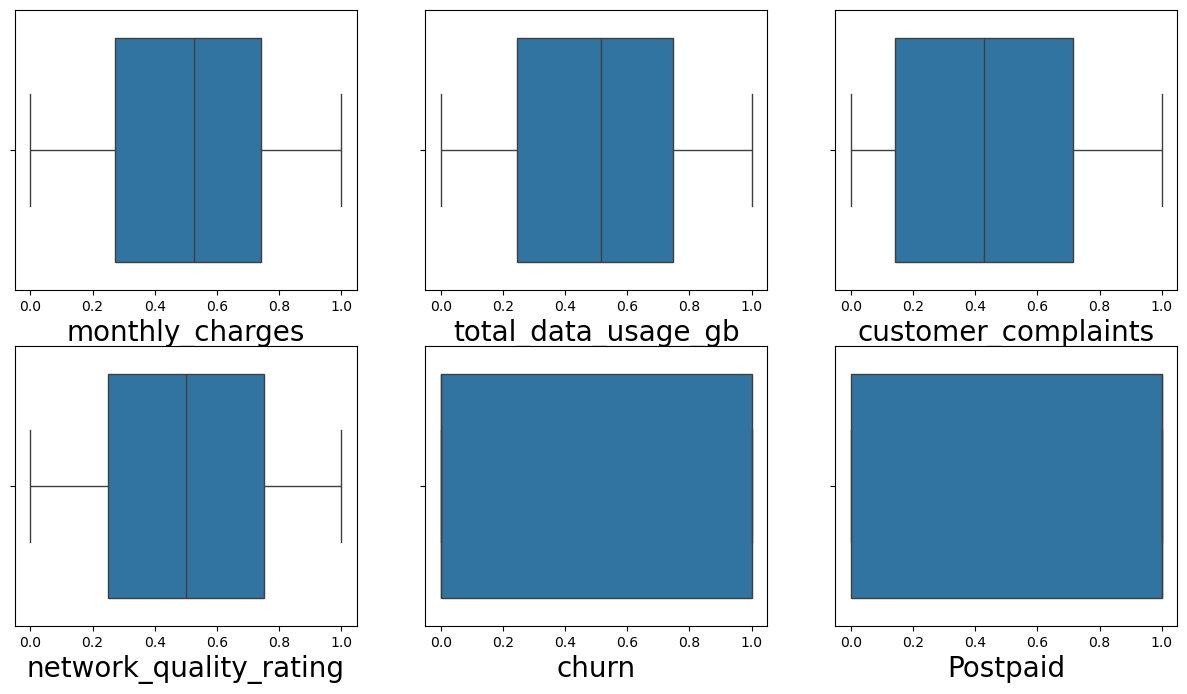

In [186]:
plt.show()

In [187]:
#import the sklearn library
import sklearn

# import the train_test_split module from sklearn 
from sklearn.model_selection import train_test_split

In [188]:
# select the target variable
Y = df_encode['churn']

# select all the independent variables
# by dropping the target variable
X = df_encode.drop(['churn'], axis = 1)

In [189]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)


In [190]:
# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",Y_train.shape)

# print the shape of 'y_test'
print("Y_test ",Y_test.shape)

X_train  (375, 6)
X_test  (125, 6)
Y_train  (375,)
Y_test  (125,)


In [143]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [145]:
y_pred = model.predict(X_test)



In [149]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.736

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        92
           1       0.00      0.00      0.00        33

    accuracy                           0.74       125
   macro avg       0.37      0.50      0.42       125
weighted avg       0.54      0.74      0.62       125


Confusion Matrix:
 [[92  0]
 [33  0]]


C:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [150]:
#Fixing Class Imbalance with SMOTE

In [191]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, Y_train)


In [192]:
model.fit(X_train_bal, y_train_bal)


LogisticRegression(max_iter=1000)

In [193]:
y_pred = model.predict(X_test)


In [194]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.57      0.65        92
           1       0.31      0.55      0.40        33

    accuracy                           0.56       125
   macro avg       0.54      0.56      0.52       125
weighted avg       0.65      0.56      0.59       125


Confusion Matrix:
 [[52 40]
 [15 18]]


In [ ]:
#Random forest model

In [196]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_rf))


Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        92
           1       0.23      0.21      0.22        33

    accuracy                           0.60       125
   macro avg       0.47      0.48      0.47       125
weighted avg       0.59      0.60      0.60       125



In [197]:
#XGBoost Model


In [198]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 4.2 MB/s eta 0:00:18
    --------------------------------------- 1.3/72.0 MB 3.9 MB/s eta 0:00:18
   - -------------------------------------- 2.1/72.0 MB 3.7 MB/s eta 0:00:20
   - -------------------------------------- 2.6/72.0 MB 3.7 MB/s eta 0:00:19
   - -------------------------------------- 3.4/72.0 MB 3.6 MB/s eta 0:00:20
   -- ------------------------------------- 4.5/72.0 MB 3.7 MB/s eta 0:00:19
   --- ------------------------------------ 5.5/72.0 MB 3.9 MB/s eta 0:00:18
   --- ------------------------------------ 5.8/72.0 MB 3.8 MB/s eta 0:00:18
   --- ------------------------------------ 6.0/72.0 MB 3.4 MB/s eta 0:00:20
   --- ------------------------------------ 6.8/72.0 MB 3.3 MB/s eta 0:00:20
   ---- ----------------------------------- 7.6/72.0 MB 3.4 MB/s eta 0:00:20
   ---- ----------------------------------- 8.7/72.0 MB 3.5 MB/s eta 0:00:19
   ---

In [199]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_xgb))


Accuracy: 0.664

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        92
           1       0.38      0.42      0.40        33

    accuracy                           0.66       125
   macro avg       0.58      0.59      0.58       125
weighted avg       0.68      0.66      0.67       125



In [ ]:
#if churn_probability > 0.5 → predict churn

In [200]:
y_probs = xgb.predict_proba(X_test)[:,1]   # probabilities for churn

from sklearn.metrics import accuracy_score, classification_report

# lower threshold
y_pred_adj = (y_probs > 0.35).astype(int)

print("Accuracy:", accuracy_score(Y_test, y_pred_adj))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_adj))


Accuracy: 0.496

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59        92
           1       0.27      0.52      0.35        33

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.47       125
weighted avg       0.61      0.50      0.53       125



In [ ]:
#So we will now try threshold = 0.40 and 0.45.

In [201]:
y_pred_adj = (y_probs > 0.45).astype(int)

print("Accuracy:", accuracy_score(Y_test, y_pred_adj))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_adj))


Accuracy: 0.624

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73        92
           1       0.34      0.45      0.39        33

    accuracy                           0.62       125
   macro avg       0.56      0.57      0.56       125
weighted avg       0.66      0.62      0.64       125



In [202]:
y_pred_adj = (y_probs > 0.40).astype(int)

print("Accuracy:", accuracy_score(Y_test, y_pred_adj))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_adj))

Accuracy: 0.568

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67        92
           1       0.30      0.48      0.37        33

    accuracy                           0.57       125
   macro avg       0.53      0.54      0.52       125
weighted avg       0.64      0.57      0.59       125



I compared multiple models including Logistic Regression, Random Forest and XGBoost for churn prediction.
Due to class imbalance in churn data, I applied SMOTE oversampling to improve churn detection.
I then adjusted the prediction threshold to find the right trade-off between accuracy and churn recall.
The final XGBoost model achieved 62% accuracy and 45% recall for churn, which provides a practical balance for identifying customers at risk of leaving.

In [203]:
#Which features influence churn the most?

In [204]:
import pandas as pd
import numpy as np

importances = xgb.feature_importances_
feature_names = X.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,customer_complaints,0.221242
3,network_quality_rating,0.208571
0,monthly_charges,0.163180
1,total_data_usage_gb,0.160092
5,Prepaid,0.134610
4,Postpaid,0.112304


In [ ]:
Final Outcom

From feature importance analysis, the most influential factor for churn was customer complaints, followed by network quality rating.
Customers who experienced poor network performance and raised more service complaints were more likely to leave the service.
Additionally, customers with higher monthly charges and lower data usage also showed higher churn probability.
Prepaid customers churned more because they have lower switching cost, while postpaid customers tend to stay longer due to contract commitment.”